In [28]:
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import date, timedelta
today = date.today()

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [4]:
data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3438,2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
3439,2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700
3440,2024-07-01,212.089996,217.509995,211.919998,216.750000,216.750000,60402900
3441,2024-07-02,216.149994,220.380005,215.100006,220.270004,220.270004,58046200
3442,2024-07-03,220.000000,221.550003,219.029999,221.550003,221.550003,37369800


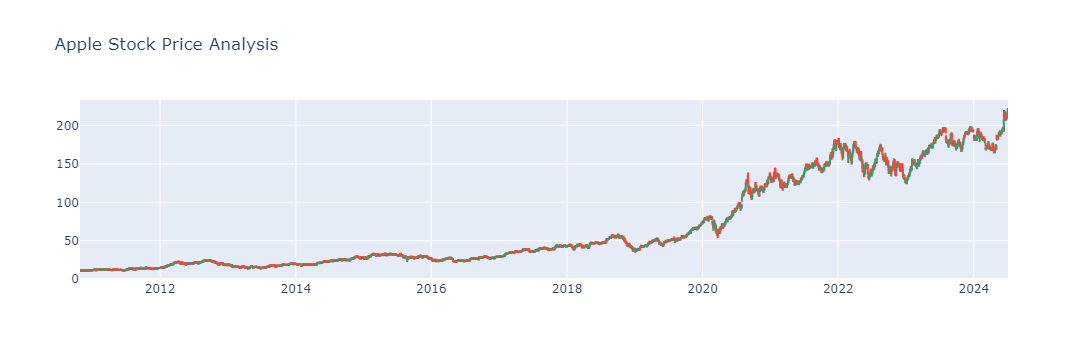

In [8]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [9]:
correlation = data.corr()
prihgthalues(ascending=False))

Close        1.000000
Adj Close    0.999959
High         0.999890
Low          0.999889
Open         0.999763
Date         0.901605
Volume      -0.529033
Name: Close, dtype: float64


In [10]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

C:\Users\shivs\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 4, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam',metrics = ['mse'],loss='mean_squared_error')

In [33]:
history=model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - loss: 3.7027 - mse: 3.7027
Epoch 2/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1.9872 - mse: 1.9872
Epoch 3/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 3.8346 - mse: 3.8346
Epoch 4/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 3.1912 - mse: 3.1912
Epoch 5/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 4.2573 - mse: 4.2573
Epoch 6/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 3.7707 - mse: 3.7707
Epoch 7/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.7045 - mse: 2.7045
Epoch 8/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.2758 - mse: 2.2758
Epoch 9/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 4.4587 - mse: 4.4587
Epoch 10/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 3.4595 - mse: 3.4595
Epoch 11/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.6044 - mse: 2.6044
Epoch 12/30
2754/2754 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.9779 - m

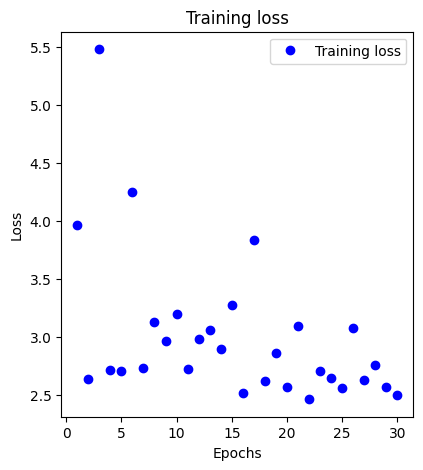

In [35]:
loss = history.history['loss']
# accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(10, 5))

# Plotting loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [37]:
loss, mse = model.evaluate(xtest, ytest)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4387 - mse: 1.4387


In [41]:
history